#                          ***TV and broadband telecommunications service churn***

## Objective:

1. Analyse and identify the customers likely to churn with available features.
1. Build classification models that predict the probability of whether customers will churn or not.

## Summary: 

The project involves working with a dataset from a TV and broadband telecommunications company. In this context, "churn" refers to customers cancelling their subscription to the company's services, resulting in a revenue loss. The goal is to leverage the existing customer data to create a predictive model that can forecast future instances of churn. This predictive model would help the company take proactive measures to retain customers and mitigate revenue loss.

### Import important libraries : 

In [1]:
# python libraries importation : 
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sn

#Feature splitting and engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Binary classificatio models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Evaluation metrics
from pprint import pprint as pp
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

## 1.   Task 1: Data Characterisation & Preprocessing

### 1.1. Import Dataset:

In [2]:
# Seperating data with the right delimiter
df = pd.read_csv('20207406.csv', sep=',', header=0)
df.head()

,customer_id,age,location,gender,credit_score,membership_length,balance,payment_method,num_products,has_broadband,has_tv,broadband_bundle,tv_bundle,num_support_calls,churn
0,90678,33.0,Connacht,Male,660,82,679.36,DirectDebit,1,True,False,1GB,NaN,1,0
1,10054,38.0,Ulster,Male,467,100,0.00,CC,2,True,True,500Mbps,Premium,1,0
2,88115,62.0,Ulster,Male,744,59,0.00,CreditCard,2,True,True,2GB,Premium,0,0
3,96168,66.0,Ulster,Female,732,84,653.51,DirectDebit,1,False,True,NaN,Premium,0,0
4,83787,33.0,Connacht,Female,745,73,605.21,CreditCard,2,True,True,1GB,Premium,3,0


In [3]:
#Dropping unnecessary column 
del df['customer_id']

### 1.2. Data Cleaning :

In [4]:
# Total number of missing values in each column
df.isnull().sum()

age                   20
location               0
gender                 0
credit_score           0
membership_length      0
balance                0
payment_method        32
num_products           0
has_broadband          0
has_tv                 0
broadband_bundle     372
tv_bundle            518
num_support_calls      0
churn                  0
dtype: int64

- The Nan values in broadband bundle and tv bundle show that the costumer didn't register for any bundle, we will then replace the values with None.

In [5]:
#replace NaN values in all columns with empty string or 0
df['age'].fillna('0', inplace=True)
df['payment_method'].fillna('None', inplace=True)
df['broadband_bundle'].fillna('None', inplace=True)
df['tv_bundle'].fillna('None', inplace=True)

### 1.3. Numerical values preprocessing :

In [6]:
# We convert the age from float to int
df[pd.to_numeric(df['age'], errors='coerce').notnull()]
df['age'] = df['age'].astype('int64')

In [7]:
df.head()

,age,location,gender,credit_score,membership_length,balance,payment_method,num_products,has_broadband,has_tv,broadband_bundle,tv_bundle,num_support_calls,churn
0,33,Connacht,Male,660,82,679.36,DirectDebit,1,True,False,1GB,None,1,0
1,38,Ulster,Male,467,100,0.00,CC,2,True,True,500Mbps,Premium,1,0
2,62,Ulster,Male,744,59,0.00,CreditCard,2,True,True,2GB,Premium,0,0
3,66,Ulster,Female,732,84,653.51,DirectDebit,1,False,True,None,Premium,0,0
4,33,Connacht,Female,745,73,605.21,CreditCard,2,True,True,1GB,Premium,3,0


### 1.4. Categorial values preprocessing :

- To prepare for the analysis, we will print the unique values of the categorial features, to check for repetitiveness and misspelling.

In [8]:
df['location'].unique()

array(['Connacht', 'Ulster', 'Munster', 'Leinster'], dtype=object)

In [9]:
df['gender'].unique()

array(['Male', 'Female', 'M', 'male', 'F', 'female'], dtype=object)

In [10]:
df['payment_method'].unique()

array(['DirectDebit', 'CC', 'CreditCard', 'None', 'DD'], dtype=object)

In [11]:
df['broadband_bundle'].unique()

array(['1GB', '500Mbps', '2GB', 'None'], dtype=object)

In [12]:
df['tv_bundle'].unique()

array(['None', 'Premium', 'Basic'], dtype=object)

In [13]:
df.loc[df["gender"] == "male", "gender"] = 'Male'
df.loc[df["gender"] == "M", "gender"] = 'Male'
df.loc[df["gender"] == "female", "gender"] = 'Female'
df.loc[df["gender"] == "F", "gender"] = 'Female'

In [14]:
df.loc[df["payment_method"] == "DD", "payment_method"] = 'DirectDebit'
df.loc[df["payment_method"] == "CC", "payment_method"] = 'CreditCard'

### 1.5. Dataset Info :

- A general view of data types and statistical description :

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1500 non-null   int64  
 1   location           1500 non-null   object 
 2   gender             1500 non-null   object 
 3   credit_score       1500 non-null   int64  
 4   membership_length  1500 non-null   int64  
 5   balance            1500 non-null   float64
 6   payment_method     1500 non-null   object 
 7   num_products       1500 non-null   int64  
 8   has_broadband      1500 non-null   bool   
 9   has_tv             1500 non-null   bool   
 10  broadband_bundle   1500 non-null   object 
 11  tv_bundle          1500 non-null   object 
 12  num_support_calls  1500 non-null   int64  
 13  churn              1500 non-null   int64  
dtypes: bool(2), float64(1), int64(6), object(5)
memory usage: 143.7+ KB


In [16]:
df.describe()

,age,credit_score,membership_length,balance,num_products,num_support_calls,churn
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,38.614000,631.176000,50.624667,396.396067,1.470667,1.620667,0.400000
std,11.321416,106.902933,35.362430,312.928694,0.632513,2.226824,0.490061
min,0.000000,280.000000,1.000000,-1.000000,1.000000,-1.000000,0.000000
25%,32.000000,556.000000,23.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,633.000000,49.000000,481.975000,1.000000,1.000000,0.000000
75%,45.000000,710.000000,79.000000,644.230625,2.000000,2.000000,1.000000
max,85.000000,886.000000,129.000000,1245.012500,4.000000,10.000000,1.000000


## 2. Task 2 : Data analysis

In [17]:
# Distribution of churn and not churn in the dataset
x = df["churn"].value_counts()
x

0    900
1    600
Name: churn, dtype: int64

- There is a slight imbalance in the dataset, with a higher count of 900 individuals who did not churn, and 600 individuals who did. This imbalance may have implications for the performance and interpretability of machine learning models, as they could be biased towards the majority class.

In [18]:
#  We count the percentil of each churn categoty
ratio = x / len(df)
ratio

0    0.6
1    0.4
Name: churn, dtype: float64

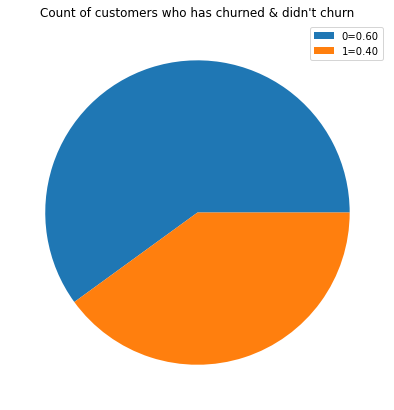

In [19]:
# We plot the percentil of each categoty
plt.figure(figsize=(7, 7))
plt.pie(ratio)
plt.legend([f"0={ratio[0]:.2f}", f"1={ratio[1]:.2f}"])
plt.title("Count of customers who has churned & didn't churn")
plt.show()

### 2.1. Numerical values Analysis : 

#### I. Number of support calls & products :

In [20]:
# number of support calls that didn't churn
x = df.loc[df['churn'] == 0]
x['num_support_calls'].value_counts()

 0    485
 1    166
 2     82
 3     46
 4     41
 5     40
 7     19
 6     19
-1      2
Name: num_support_calls, dtype: int64

[Text(0.5, 0, 'number of support calls')]

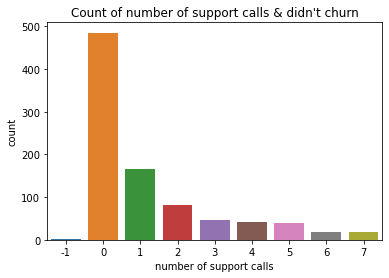

In [21]:
plt.title("Count of number of support calls & didn't churn")
ax = sn.countplot(x = 'num_support_calls' ,  data = x)
ax.set(xlabel='number of support calls')

In [22]:
# number of support calls that churned
x = df.loc[df['churn'] == 1]
x['num_support_calls'].value_counts()

 0     183
 1     147
 2      86
 3      43
 7      28
 6      28
 5      26
 4      21
 9      15
 8      13
 10      9
-1       1
Name: num_support_calls, dtype: int64

[Text(0.5, 0, 'number of support calls')]

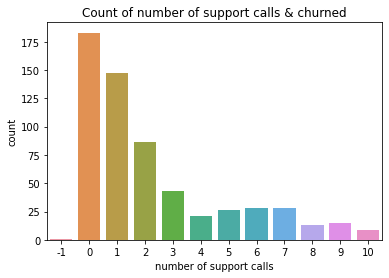

In [23]:
plt.title("Count of number of support calls & churned")
ax = sn.countplot(x = 'num_support_calls' ,  data = x)
ax.set(xlabel='number of support calls')

- The number of calls made by clients impacts on the decision to churn, particularly when the call volume surpasses seven. This finding suggests that a higher frequency of customer support calls may be associated with an increased likelihood of churn. The reasons behind this trend could range from unresolved issues or dissatisfaction with the services to a potential indicator of customer frustration.


In [24]:
# number products owned by clients that didn't churn
x = df.loc[df['churn'] == 0]
x['num_products'].value_counts()

1    462
2    434
3      4
Name: num_products, dtype: int64

[Text(0.5, 0, 'number of products')]

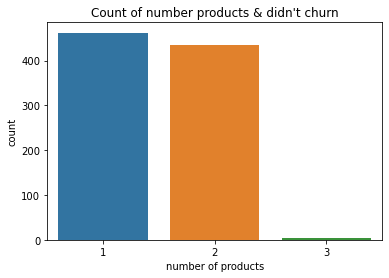

In [25]:
plt.title("Count of number products & didn't churn")
ax = sn.countplot(x = 'num_products', data = x)
ax.set(xlabel='number of products')

In [26]:
# number products owned by clients that churned
x = df.loc[df['churn'] == 1]
x['num_products'].value_counts()

1    428
2     97
3     58
4     17
Name: num_products, dtype: int64

[Text(0.5, 0, 'number of products')]

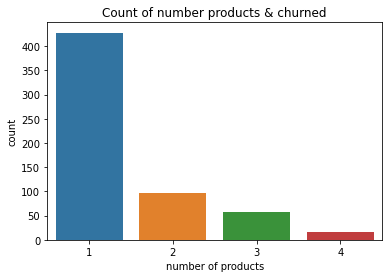

In [27]:
plt.title("Count of number products & churned")
ax = sn.countplot(x = 'num_products', data = x)
ax.set(xlabel='number of products')

- The plots show a relationship between the number of products and the decision to churn. Specifically, when clients have more than two products, an impact on churn becomes evident. In these cases, only four clients who had three products did not churn, while the remaining clients with three or more products ultimately chose to discontinue their subscriptions. This observation suggests that an increase in the number of products may correlate with a higher likelihood of churn among customers.

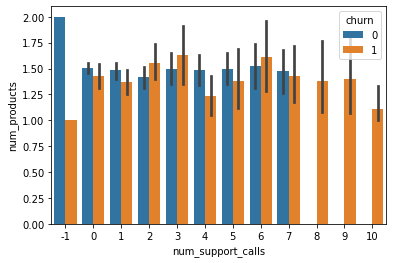

In [28]:
# a summary visualisation of the analysis
sn.barplot(x='num_support_calls',y='num_products', data=df,
            hue='churn')

plt.show()

#### II. Credit score, balance, membership length & Age :

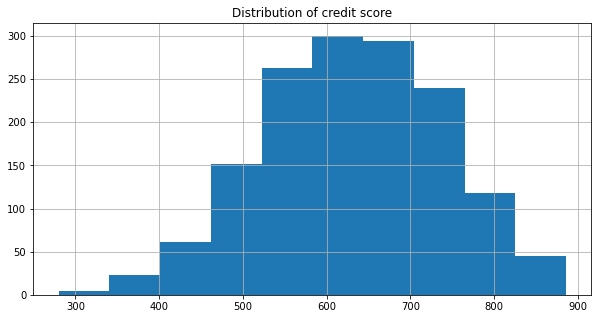

In [29]:
df['credit_score'].hist(figsize=(10,5))
plt.title("Distribution of credit score")
plt.show()

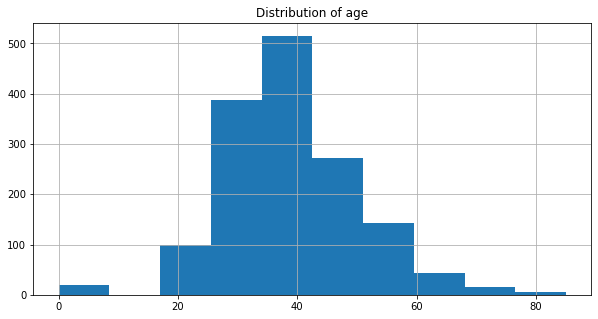

In [30]:
df['age'].hist(figsize=(10,5))
plt.title("Distribution of age")
plt.show()

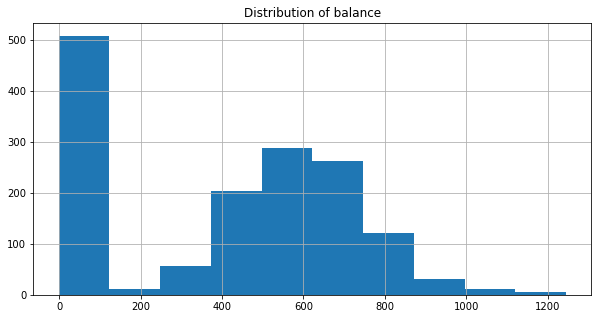

In [31]:
df['balance'].hist(figsize=(10,5))
plt.title("Distribution of balance")
plt.show()

- Approximately 500 client did not register their balance.

In [32]:
#From the clients who didn't register their balance, let's analyse how many did not churn
x = df.loc[df['balance'] == 0]
x['churn'].value_counts()

0    344
1    153
Name: churn, dtype: int64

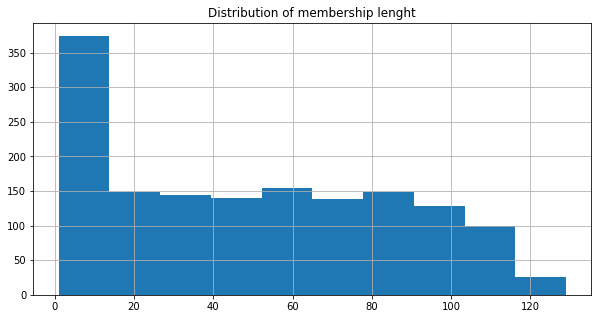

In [33]:
df['membership_length'].hist(figsize=(10,5))
plt.title("Distribution of membership lenght")
plt.show()

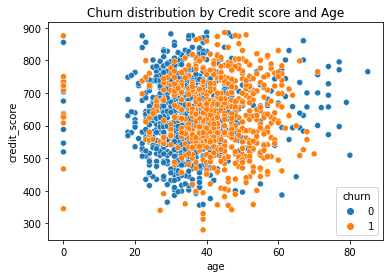

In [34]:
plt.title("Churn distribution by Credit score and Age")
sn.scatterplot(x='age', y='credit_score', data=df,
               hue='churn')
plt.show()

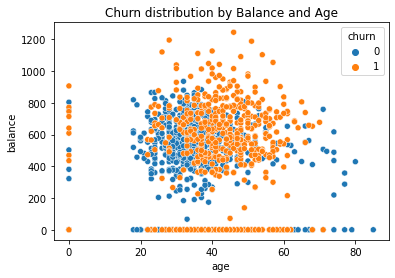

In [35]:
plt.title("Churn distribution by Balance and Age")
sn.scatterplot(x='age', y='balance', data=df,
               hue='churn')
plt.show()

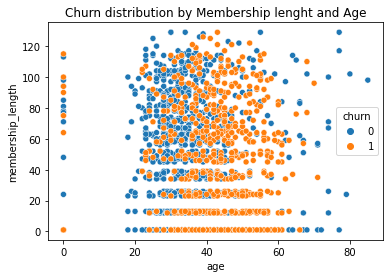

In [36]:
plt.title("Churn distribution by Membership lenght and Age")
sn.scatterplot(x='age', y='membership_length', data=df,
               hue='churn')
plt.show()

- The analysis of many features indicates several factors that contribute to customers canceling their subscriptions. Notably, clients with a credit score below 400, those falling within the age range of 40 to 60 years, clients maintaining a balance exceeding 900, and those with a membership length under 40 are more likely of canceling their subscriptions. 

### 2.2. Categorial values Analysis : 

#### I. Churning by location and age : 

In [37]:
# number of clients in location that did and didn't churn
df.groupby('location')['churn'].value_counts()

location  churn
Connacht  0        244
          1        119
Leinster  0        336
          1        168
Munster   1        245
          0        227
Ulster    0         93
          1         68
Name: churn, dtype: int64

In [38]:
# number of clients gender that did and didn't churn
df.groupby('gender')['churn'].value_counts()

gender  churn
Female  0        386
        1        328
Male    0        514
        1        272
Name: churn, dtype: int64

Text(0.5, 1.0, 'Distribution of subscription status by Location and gender')

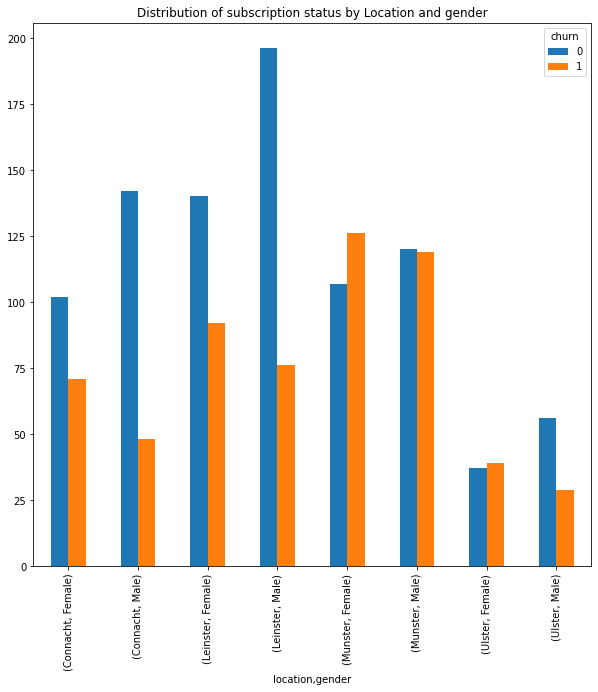

In [39]:
df.groupby(["location", "gender","churn"]).size().unstack().plot(kind='bar', figsize=(10,10)) 
plt.title('Distribution of subscription status by Location and gender')

- This reveals a trend among customers residing in Munster, where the rate of unsubscriptions exceeds that of subscriptions, making it the highest among all regions.

- Additionally, the bar plot highlights a gender-based distinction in churn behavior, with females showing a higher likelihood of unsubscribing compared to males, who demonstrate a tendency to retain their subscriptions. 

#### III. Churning by method of payment

Let's analyse the methode of payment used by the client who is most likely to churn

In [40]:
# number of clients payment method that did and didn't churn
df.groupby('payment_method')['churn'].value_counts()

payment_method  churn
CreditCard      0        249
                1        188
DirectDebit     0        627
                1        404
None            0         24
                1          8
Name: churn, dtype: int64

Text(0.5, 1.0, 'Distribution of subscription status by payment method')

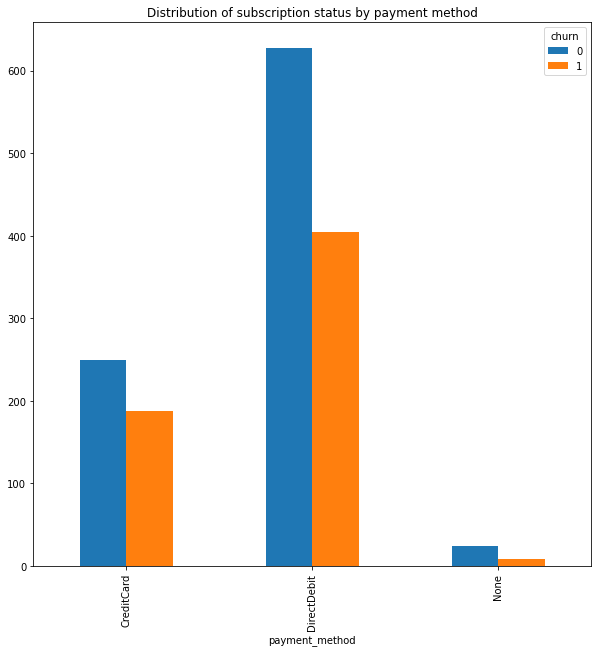

In [41]:
df.groupby(["payment_method","churn"]).size().unstack().plot(kind='bar', figsize=(10,10)) 
plt.title('Distribution of subscription status by payment method')

- Customers who paid through Direct Debit tend to cancel their subscriptions. This raises questions about the factors influencing customer decisions to discontinue services, despite utilizing the Direct Debit payment method. 

#### III. Churning by method of broadband and tv bundle : 

In [42]:
# number of clients broadband bundle that did and didn't churn
df.groupby('broadband_bundle')['churn'].value_counts()

broadband_bundle  churn
1GB               0        251
                  1        175
2GB               0        333
                  1         37
500Mbps           0        177
                  1        155
None              1        233
                  0        139
Name: churn, dtype: int64

In [43]:
# number of clients TV bundle that did and didn't churn
df.groupby('tv_bundle')['churn'].value_counts()

tv_bundle  churn
Basic      0        279
           1        203
None       0        323
           1        195
Premium    0        298
           1        202
Name: churn, dtype: int64

Text(0.5, 1.0, 'Distribution of subscription status by broadband and TV')

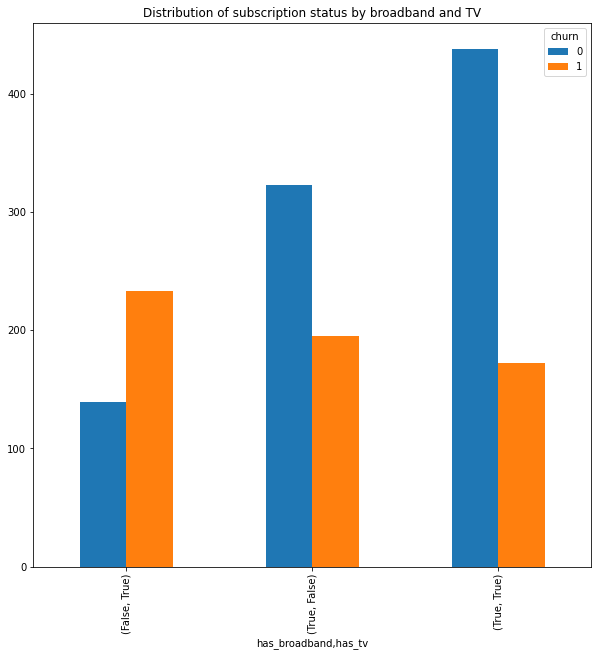

In [44]:
df.groupby(["has_broadband","has_tv","churn"]).size().unstack().plot(kind='bar', figsize=(10,10)) 
plt.title('Distribution of subscription status by broadband and TV')

Text(0.5, 1.0, 'Distribution of subscription status by broadband and TV bundle')

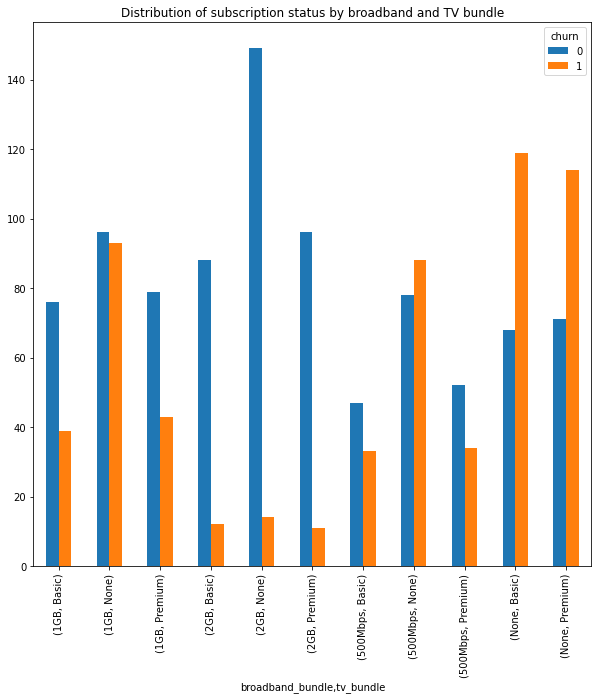

In [45]:
df.groupby(["broadband_bundle","tv_bundle","churn"]).size().unstack().plot(kind='bar', figsize=(10,10)) 
plt.title('Distribution of subscription status by broadband and TV bundle')

#### The analysis reveals patterns within specific service bundles and their correlation with customer churn :

- Notably, clients only subscribed to the TV bundle exhibit a higher churn rate compared to others, suggesting a potential dissatisfaction or unmet needs within this particular service offering. Conversely, clients with the 2GB broadband bundle display a notable trend of retaining their subscriptions, implying a higher satisfaction level or perceived value in this service category.

- Furthermore, Clients lacking both the TV bundle and possessing the lowest broadband bundle are more prone to churning. This subgroup may represent a segment with distinct preferences or needs that are not adequately addressed by the current service offerings.

- Overall, these findings underscore the importance of tailoring strategies based on specific service bundles, allowing for effective approaches to mitigate churn within distinct customer segments.

## 3. Task 3 : Classification

### 3.1. Feature Engineering : 

In [46]:
# Encode the categorial values into numerical values for training
label_encoder = LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender']) 
df['location']= label_encoder.fit_transform(df['location']) 
df['payment_method']= label_encoder.fit_transform(df['payment_method']) 
df['broadband_bundle']= label_encoder.fit_transform(df['broadband_bundle']) 
df['tv_bundle']= label_encoder.fit_transform(df['tv_bundle']) 

In [47]:
# Scaling the numerical values for training
scaler = scaler = StandardScaler()
df[['balance','membership_length','credit_score','age']] = scaler.fit_transform(df[['balance','membership_length','credit_score','age']]) 

In [48]:
# the general correlation between the features and churning
correlation = df.corr()

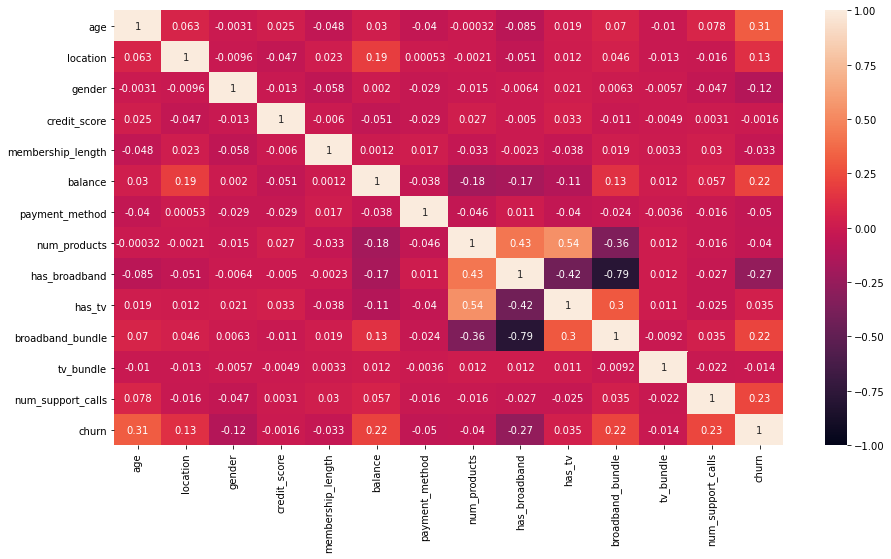

In [49]:
plt.figure(figsize=(15,8))
sn.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

- The heatmap analysis highlights key features that exhibit a significant correlation with churn. Notably, variables such as age, location, balance, broadband bundle, and the number of support calls emerge as particularly influential factors in predicting churn. 

### 3.2. Train and test splitting :  

In [50]:
X = df[['age','location','gender','credit_score','membership_length','balance','payment_method','num_products',
        'has_broadband','has_tv','broadband_bundle','tv_bundle','num_support_calls']]
Y  = df['churn']

X_Train, X_Test, Y_Train, Y_Test= train_test_split(X, Y, train_size=0.75, random_state=42)

### 3.3. Model training and validation :

In [51]:
%%time

# We will creat a pipeline where we will add the models with different parametes to test their performance
classifiers = [
    LogisticRegression(),
    LogisticRegression(penalty = 'none'),
    LogisticRegression(penalty = 'l1', solver ='liblinear', random_state=42),
    LogisticRegression(solver ='liblinear', random_state=42),
    LogisticRegression(solver ='newton-cg', random_state=42),
    
    SVC(),
    SVC(kernel="linear", C=0.5),
    SVC(kernel="poly", C=0.5),
    SVC(C=2),

    ]

top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    
    # training model
    pipe.fit(X_Train, Y_Train)   
    print(classifier)
    
    # Model validation
    acc_score = pipe.score(X_Test, Y_Test)
    print("model score: %.3f" % acc_score)
    print("")
    
    # using the model to predict
    y_pred = pipe.predict(X_Test)
    
    #if acc_score > 0.8:
    top_class.append(classifier)

LogisticRegression()
model score: 0.781

LogisticRegression(penalty='none')
model score: 0.784

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
model score: 0.792

LogisticRegression(random_state=42, solver='liblinear')
model score: 0.784

LogisticRegression(random_state=42, solver='newton-cg')
model score: 0.781

SVC()
model score: 0.821

SVC(C=0.5, kernel='linear')
model score: 0.787

SVC(C=0.5, kernel='poly')
model score: 0.813

SVC(C=2)
model score: 0.827

Wall time: 312 ms


- The analysis identifies two top-performing models: logistic regression with regularization l1 and a liblinear solver, and Support Vector Classifier (SVC) with a Regularization parameter set at 2.
- While both SVC and logistic regression proves to be efficient in terms of both performance and training time, the SVC model exhibits a longer training duration.
- We will retrain both models independently to ensure their performance and visualize their predictive capabilities through the confusion matrices. This approach enables a more understanding of the models' strengths and potential areas for improvement.

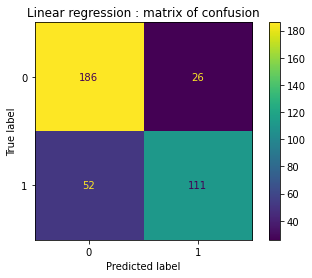

In [52]:
# Linear regression
lr = LogisticRegression(penalty = 'l1', solver ='liblinear', random_state=42)
lr.fit(X_Train, Y_Train)
y_pred_lr = lr.predict(X_Test)
#print(confusion_matrix(Y_Test, y_pred))
plot_confusion_matrix(lr, X_Test, Y_Test) 
plt.title("Linear regression : matrix of confusion")
plt.show() 

In [53]:
precision, recall, fscore, support = score(Y_Test, y_pred_lr)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.78151261 0.81021898]
recall: [0.87735849 0.6809816 ]
fscore: [0.82666667 0.74      ]
support: [212 163]


In [54]:
# Let's print the metrics
s = classification_report(Y_Test, y_pred_lr)
pp(s)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.78      0.88      0.83       212\n'
 '           1       0.81      0.68      0.74       163\n'
 '\n'
 '    accuracy                           0.79       375\n'
 '   macro avg       0.80      0.78      0.78       375\n'
 'weighted avg       0.79      0.79      0.79       375\n')


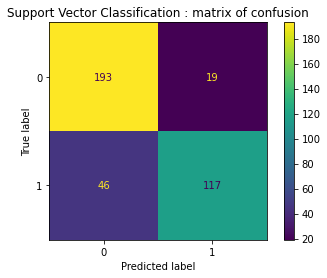

In [55]:
# SVC
svc = SVC(C=2)
svc.fit(X_Train, Y_Train)
y_pred_svc = svc.predict(X_Test)
plot_confusion_matrix(svc, X_Test, Y_Test) 
plt.title("Support Vector Classification : matrix of confusion")
plt.show() 

In [56]:
# Let's print the metrics
s = classification_report(Y_Test, y_pred_svc)
pp(s)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.81      0.91      0.86       212\n'
 '           1       0.86      0.72      0.78       163\n'
 '\n'
 '    accuracy                           0.83       375\n'
 '   macro avg       0.83      0.81      0.82       375\n'
 'weighted avg       0.83      0.83      0.82       375\n')


## Conclusion :

#### In conclusion :
- Our analysis reveals the presence of an imbalanced dataset, characterized by a higher number of non-churning cases. Despite this bias, the classification models demonstrated a good performance in accurately predicting both true positives and negatives related to customer churn. The prospect of enhancing predictive accuracy is promising, particularly with an increase in the volume of observations. Although the models achieved scores above average, acknowledging logistic regression as the leading performer, the models necessitates further refinements and modifications. This implies an ongoing need for fine-tuning and optimization to elevate the models' precision in forecasting future instances of customer churn.	